### Lib

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense

from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical

from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


2023-05-01 01:01:55.318380: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-01 01:01:55.756358: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-01 01:01:55.760373: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-01 01:01:57.377779: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### LOAD DATA

In [2]:
dataset = pd.read_csv('Dataset.txt')

In [3]:
print(dataset.head())

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2             

In [4]:
print(dataset.shape)

(125973, 43)


In [5]:
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [6]:
dataset.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


### CLEAINGING DATASET

In [7]:
dataset = dataset.drop_duplicates()
print(dataset)

        duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           tcp  ftp_data   SF        491          0     0   
1              0           udp     other   SF        146          0     0   
2              0           tcp   private   S0          0          0     0   
3              0           tcp      http   SF        232       8153     0   
4              0           tcp      http   SF        199        420     0   
...          ...           ...       ...  ...        ...        ...   ...   
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0      

### MISSING VALUES

In [8]:
dataset.fillna(0, inplace=True)

In [9]:
print(dataset.isnull().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

### OUTLIER

In [10]:
print(dataset.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_category', 'occurance'],
      dtype='object')


In [11]:
print(dataset['attack_category'].value_counts())

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack_category, dtype: int64


In [12]:
print(dataset['protocol_type'].value_counts())

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64


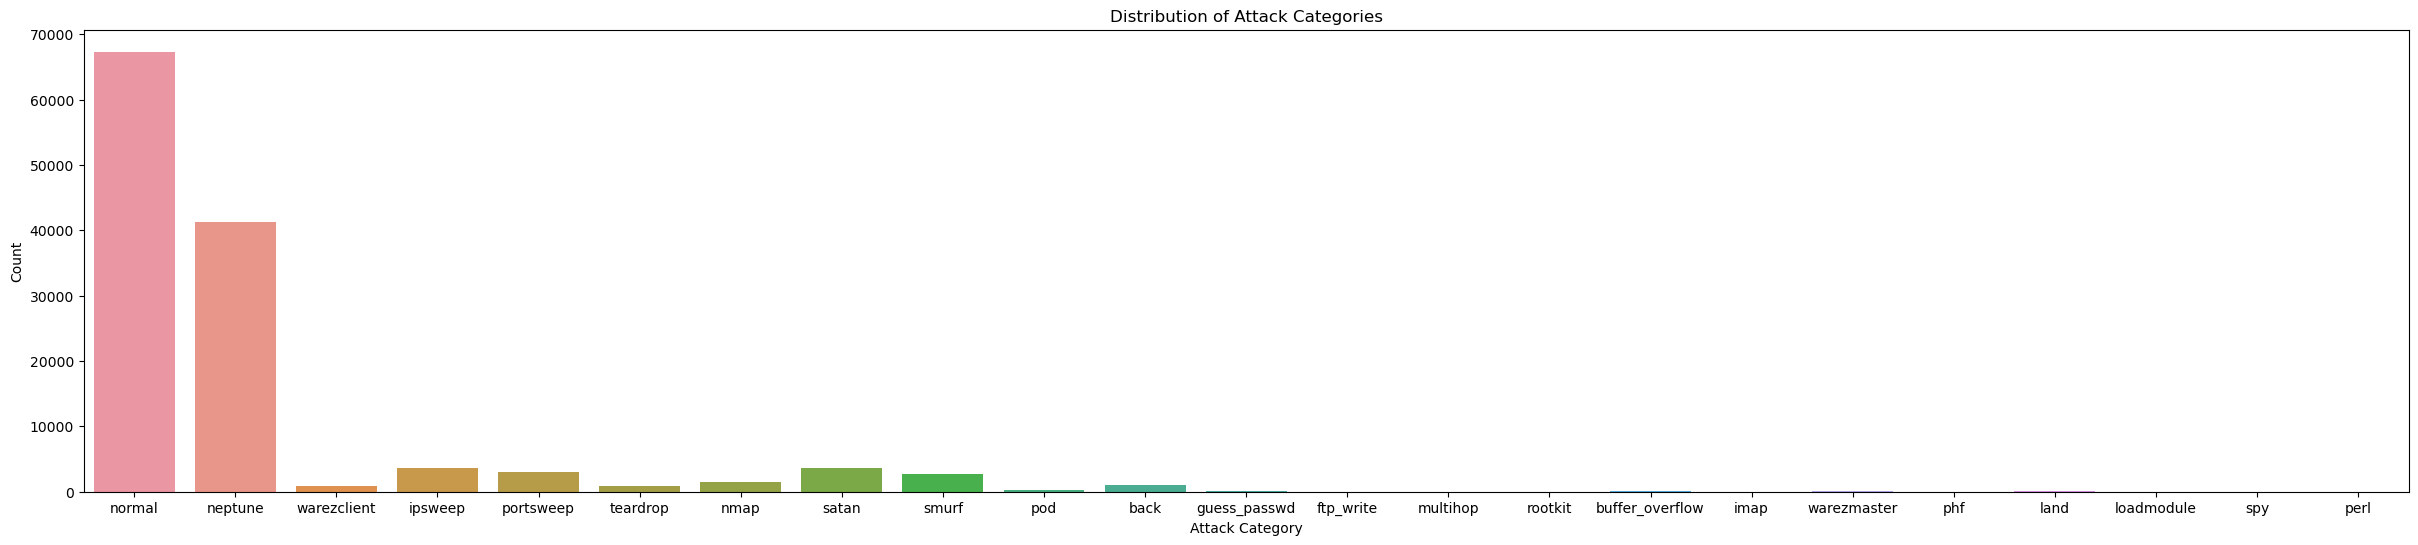

In [13]:
plt.figure(figsize=(30, 6))
sns.countplot(x='attack_category', data=dataset)
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.title('Distribution of Attack Categories')
plt.show()

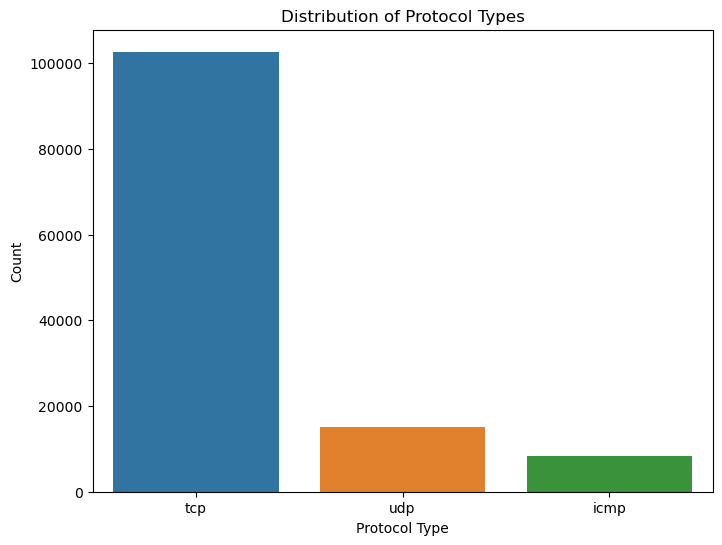

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='protocol_type', data=dataset)
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.title('Distribution of Protocol Types')
plt.show()

In [15]:
obj = dataset.describe(include='object')
print(obj)

       protocol_type service    flag attack_category
count         125973  125973  125973          125973
unique             3      70      11              23
top              tcp    http      SF          normal
freq          102689   40338   74945           67343


In [16]:
obj = obj.drop(['top'], axis=0)
print(obj)

       protocol_type service    flag attack_category
count         125973  125973  125973          125973
unique             3      70      11              23
freq          102689   40338   74945           67343


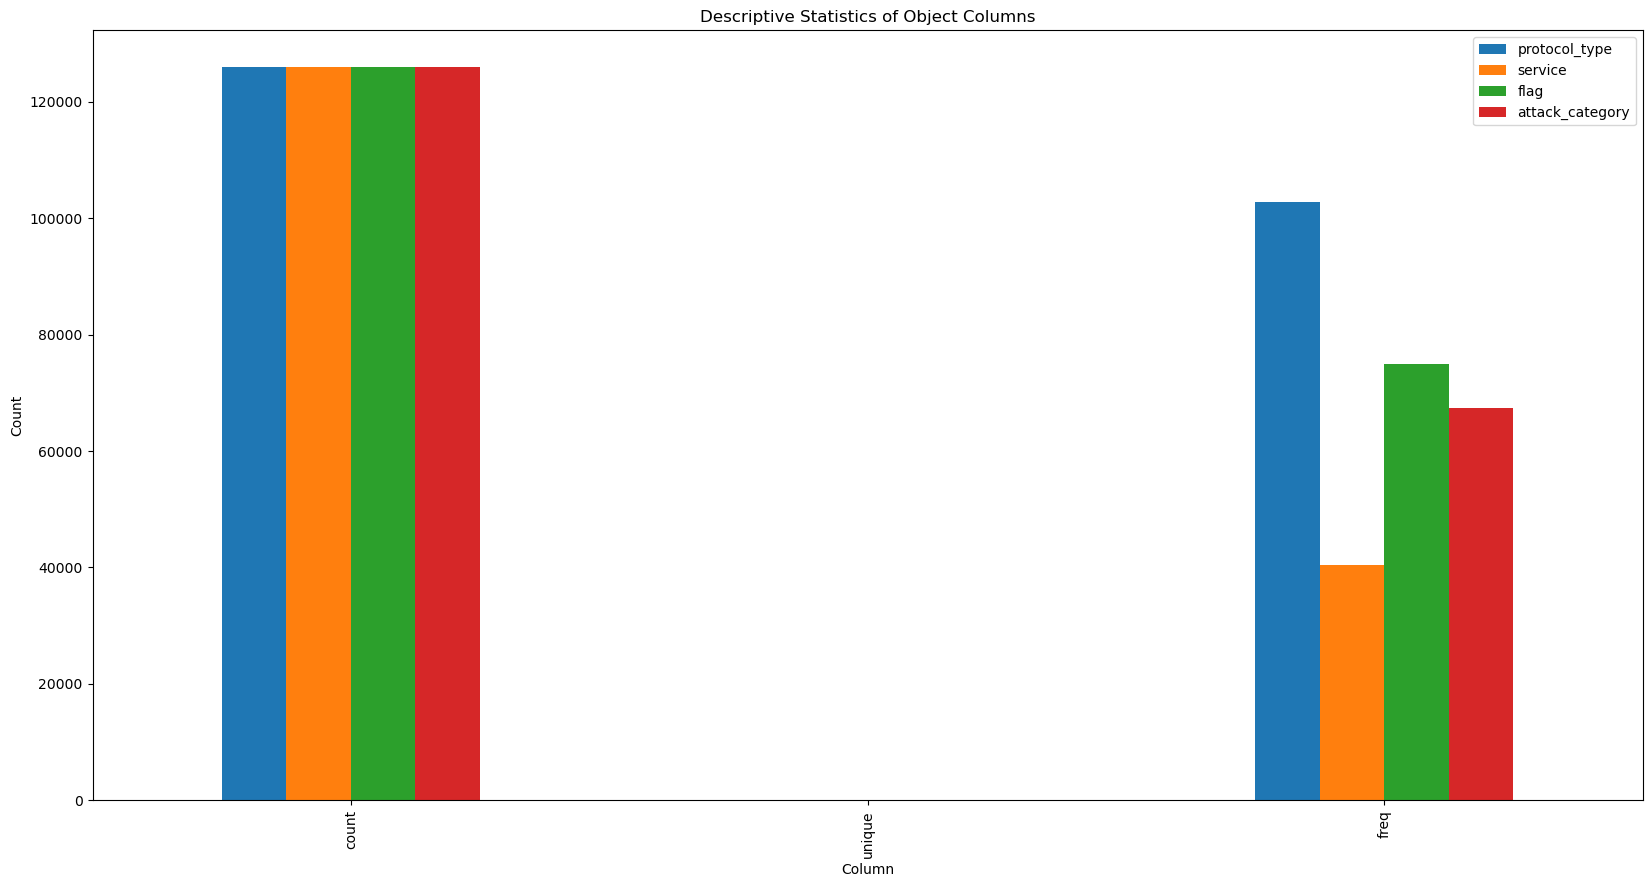

In [17]:
obj.plot(kind='bar', figsize=(20, 10))
plt.xlabel('Column')
plt.ylabel('Count')
plt.title('Descriptive Statistics of Object Columns')
plt.show()


### ATTACKING FILE 

In [18]:
data = pd.read_csv("Attack_types.txt")

In [19]:
print(data)

   attack_category attack_type
0                  apache2 dos
1                     back dos
2                 mailbomb dos
3             processtable dos
4            snmpgetattack dos
5                 teardrop dos
6                    smurf dos
7                     land dos
8                  neptune dos
9                      pod dos
10                udpstorm dos
11                      ps u2r
12         buffer_overflow u2r
13                    perl u2r
14                 rootkit u2r
15              loadmodule u2r
16                   xterm u2r
17               sqlattack u2r
18              httptunnel u2r
19               ftp_write r2l
20            guess_passwd r2l
21               snmpguess r2l
22                    imap r2l
23                     spy r2l
24             warezclient r2l
25             warezmaster r2l
26                multihop r2l
27                     phf r2l
28                    imap r2l
29                   named r2l
30                sendmail r2l
31      

In [20]:
data.shape

(41, 1)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   attack_category attack_type  41 non-null     object
dtypes: object(1)
memory usage: 456.0+ bytes


In [22]:
data[['attack_category', 'attack_type']] = data['attack_category attack_type'].str.split(' ', 1, expand=True)
data.drop(columns=['attack_category attack_type'], inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   attack_category  41 non-null     object
 1   attack_type      41 non-null     object
dtypes: object(2)
memory usage: 784.0+ bytes


In [24]:
data['attack_type'].value_counts()

r2l      15
dos      11
u2r       8
probe     7
Name: attack_type, dtype: int64

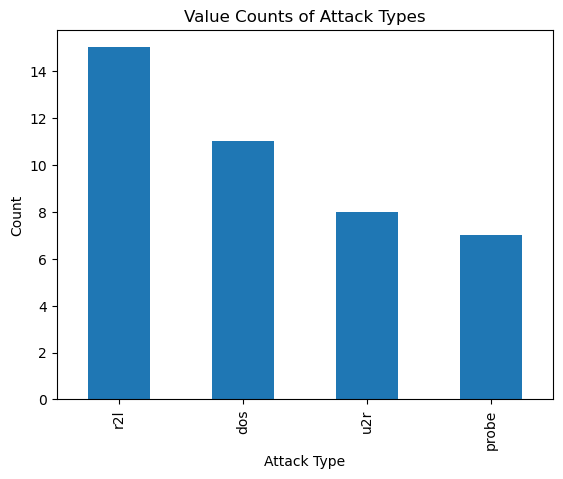

In [25]:
data['attack_type'].value_counts().plot(kind='bar')
plt.title('Value Counts of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

### correlation analysis

In [26]:
attack_mapping = dict(zip(data['attack_category'], data['attack_type']))

In [27]:
dataset['attack_type'] = dataset['attack_category'].map(attack_mapping)
dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,NaN
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,NaN
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,NaN
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,dos
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,NaN
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,NaN
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,dos


In [28]:
dataset['attack_type'].value_counts()

dos      45927
probe    11656
r2l        995
u2r         52
Name: attack_type, dtype: int64

### Classification of Cyber Attacks Using Decision Tree Algorithm

In [29]:
data['attack_category']

0             apache2
1                back
2            mailbomb
3        processtable
4       snmpgetattack
5            teardrop
6               smurf
7                land
8             neptune
9                 pod
10           udpstorm
11                 ps
12    buffer_overflow
13               perl
14            rootkit
15         loadmodule
16              xterm
17          sqlattack
18         httptunnel
19          ftp_write
20       guess_passwd
21          snmpguess
22               imap
23                spy
24        warezclient
25        warezmaster
26           multihop
27                phf
28               imap
29              named
30           sendmail
31              xlock
32             xsnoop
33               worm
34               nmap
35            ipsweep
36          portsweep
37              satan
38              mscan
39              saint
40               worm
Name: attack_category, dtype: object

In [30]:
data['attack_type']

0       dos
1       dos
2       dos
3       dos
4       dos
5       dos
6       dos
7       dos
8       dos
9       dos
10      dos
11      u2r
12      u2r
13      u2r
14      u2r
15      u2r
16      u2r
17      u2r
18      u2r
19      r2l
20      r2l
21      r2l
22      r2l
23      r2l
24      r2l
25      r2l
26      r2l
27      r2l
28      r2l
29      r2l
30      r2l
31      r2l
32      r2l
33      r2l
34    probe
35    probe
36    probe
37    probe
38    probe
39    probe
40    probe
Name: attack_type, dtype: object

In [31]:
dataset['attack_type']

0         NaN
1         NaN
2         dos
3         NaN
4         NaN
         ... 
125968    dos
125969    NaN
125970    NaN
125971    dos
125972    NaN
Name: attack_type, Length: 125973, dtype: object

In [32]:
dataset['attack_category']

0          normal
1          normal
2         neptune
3          normal
4          normal
           ...   
125968    neptune
125969     normal
125970     normal
125971    neptune
125972     normal
Name: attack_category, Length: 125973, dtype: object

In [33]:
dataset = pd.merge(dataset, data[["attack_category", "attack_type"]], on="attack_type")
dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category_x,occurance,attack_type,attack_category_y
0,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.0,1.0,1.0,0.0,0.0,neptune,19,dos,apache2
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.0,1.0,1.0,0.0,0.0,neptune,19,dos,back
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.0,1.0,1.0,0.0,0.0,neptune,19,dos,mailbomb
3,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.0,1.0,1.0,0.0,0.0,neptune,19,dos,processtable
4,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.0,1.0,1.0,0.0,0.0,neptune,19,dos,snmpgetattack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602125,21,tcp,telnet,SF,135,1290,0,0,0,0,...,0.17,0.0,0.0,0.0,0.0,0.0,loadmodule,1,u2r,rootkit
602126,21,tcp,telnet,SF,135,1290,0,0,0,0,...,0.17,0.0,0.0,0.0,0.0,0.0,loadmodule,1,u2r,loadmodule
602127,21,tcp,telnet,SF,135,1290,0,0,0,0,...,0.17,0.0,0.0,0.0,0.0,0.0,loadmodule,1,u2r,xterm
602128,21,tcp,telnet,SF,135,1290,0,0,0,0,...,0.17,0.0,0.0,0.0,0.0,0.0,loadmodule,1,u2r,sqlattack


In [34]:
dataset['attack_category_x']

0            neptune
1            neptune
2            neptune
3            neptune
4            neptune
             ...    
602125    loadmodule
602126    loadmodule
602127    loadmodule
602128    loadmodule
602129    loadmodule
Name: attack_category_x, Length: 602130, dtype: object

In [35]:
dataset['attack_category_y']

0               apache2
1                  back
2              mailbomb
3          processtable
4         snmpgetattack
              ...      
602125          rootkit
602126       loadmodule
602127            xterm
602128        sqlattack
602129       httptunnel
Name: attack_category_y, Length: 602130, dtype: object

In [36]:
dataset['attack_type']

0         dos
1         dos
2         dos
3         dos
4         dos
         ... 
602125    u2r
602126    u2r
602127    u2r
602128    u2r
602129    u2r
Name: attack_type, Length: 602130, dtype: object

In [37]:
dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category_x,occurance,attack_type,attack_category_y
0,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.0,1.0,1.0,0.0,0.0,neptune,19,dos,apache2
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.0,1.0,1.0,0.0,0.0,neptune,19,dos,back
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.0,1.0,1.0,0.0,0.0,neptune,19,dos,mailbomb
3,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.0,1.0,1.0,0.0,0.0,neptune,19,dos,processtable
4,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.0,1.0,1.0,0.0,0.0,neptune,19,dos,snmpgetattack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602125,21,tcp,telnet,SF,135,1290,0,0,0,0,...,0.17,0.0,0.0,0.0,0.0,0.0,loadmodule,1,u2r,rootkit
602126,21,tcp,telnet,SF,135,1290,0,0,0,0,...,0.17,0.0,0.0,0.0,0.0,0.0,loadmodule,1,u2r,loadmodule
602127,21,tcp,telnet,SF,135,1290,0,0,0,0,...,0.17,0.0,0.0,0.0,0.0,0.0,loadmodule,1,u2r,xterm
602128,21,tcp,telnet,SF,135,1290,0,0,0,0,...,0.17,0.0,0.0,0.0,0.0,0.0,loadmodule,1,u2r,sqlattack


In [38]:
dataset = pd.get_dummies(dataset, columns=["protocol_type", "service", "flag"])

In [39]:
dataset

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602125,21,135,1290,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
602126,21,135,1290,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
602127,21,135,1290,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
602128,21,135,1290,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(["attack_category_x", "attack_category_y", "attack_type"], axis=1), dataset[["attack_category_x"]], test_size=0.2, random_state=42)


In [41]:
X_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
594275,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
311826,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
485200,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
35047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
374110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
505005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
158088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
442785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [42]:
X_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
566453,14218,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
502456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
377040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
34450,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
259178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
365838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
131932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [43]:
y_test

,attack_category_x
594275,satan
311826,neptune
485200,neptune
35047,neptune
374110,neptune
...,...
96005,neptune
505005,neptune
158088,neptune
442785,neptune


In [44]:
y_train

,attack_category_x
566453,portsweep
502456,neptune
53310,neptune
377040,neptune
34450,neptune
...,...
110268,neptune
259178,neptune
365838,neptune
131932,neptune


In [45]:
# Encode the target labels using LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Fit the decision tree model to the training data
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict the attack categories for the testing data
y_pred = model.predict(X_test)

# Decode the predicted attack categories
y_pred = le.inverse_transform(y_pred)

# Evaluate the performance of the model using accuracy, precision, recall, and F1 score metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

/home/lycan/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lycan/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Mix of label input types (string and number)

In [46]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Create a bar plot
plt.bar(metrics, values)

# Set the plot title and axis labels
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Show the plot
plt.show()


NameError: name 'precision' is not defined

### KNN

In [ ]:
# Determine the optimal value of k
best_k = 0
best_accuracy = 0
for k in range(1, 3):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"a-> {accuracy} A -> {best_accuracy}" )
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Best k: {}".format(best_k))

In [ ]:
# Train the model with the optimal value of k
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

# Predict the attack categories for the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model using accuracy, precision, recall, and F1 score metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Create a bar plot
plt.bar(metrics, values)

# Set the plot title and axis labels
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Show the plot
plt.show()

### MLP

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(dataset['attack_category_x'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(["attack_category_x", "attack_category_y", "attack_type"], axis=1), y, test_size=0.2, random_state=42)

# Define the model architecture
n_classes = len(le.classes_)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
y_pred = tf.argmax(y_pred, axis=1)
accuracy = tf.keras.metrics.Accuracy()(y_test, y_pred)
precision = tf.keras.metrics.Precision()(y_test, y_pred)
recall = tf.keras.metrics.Recall()(y_test, y_pred)
f1 = (2 * precision * recall) / (precision + recall)
report = classification_report(y_test, y_pred, target_names=le.classes_)

# Print the evaluation metrics and classification report
print('Accuracy: %.2f%%' % (accuracy*100))
print('Precision: %.2f%%' % (precision*100))
print('Recall: %.2f%%' % (recall*100))
print('F1-score: %.2f%%' % (f1*100))
print('Classification Report:\n', report)
